In [1]:
#image classification model using CNN on fashion MNIST dataset

In [2]:
# Importing Packages
import numpy as np
from matplotlib import pyplot
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline

2023-10-09 14:46:59.886968: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-09 14:46:59.953079: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-09 14:46:59.955917: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-09 14:46:59.955927: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train.shape, y_train.shape, "____" , X_test.shape, y_test.shape
((60000, 28, 28), (60000,), '____', (10000, 28, 28), (10000,))
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [4]:
class_labels = ["Trouser", "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker",]
class_labels

['Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker']

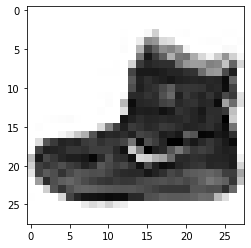

In [5]:
plt.imshow(X_train[0] , cmap="Greys")

In [6]:
X_train. shape

(60000, 28, 28)

IndexError: list index out of range

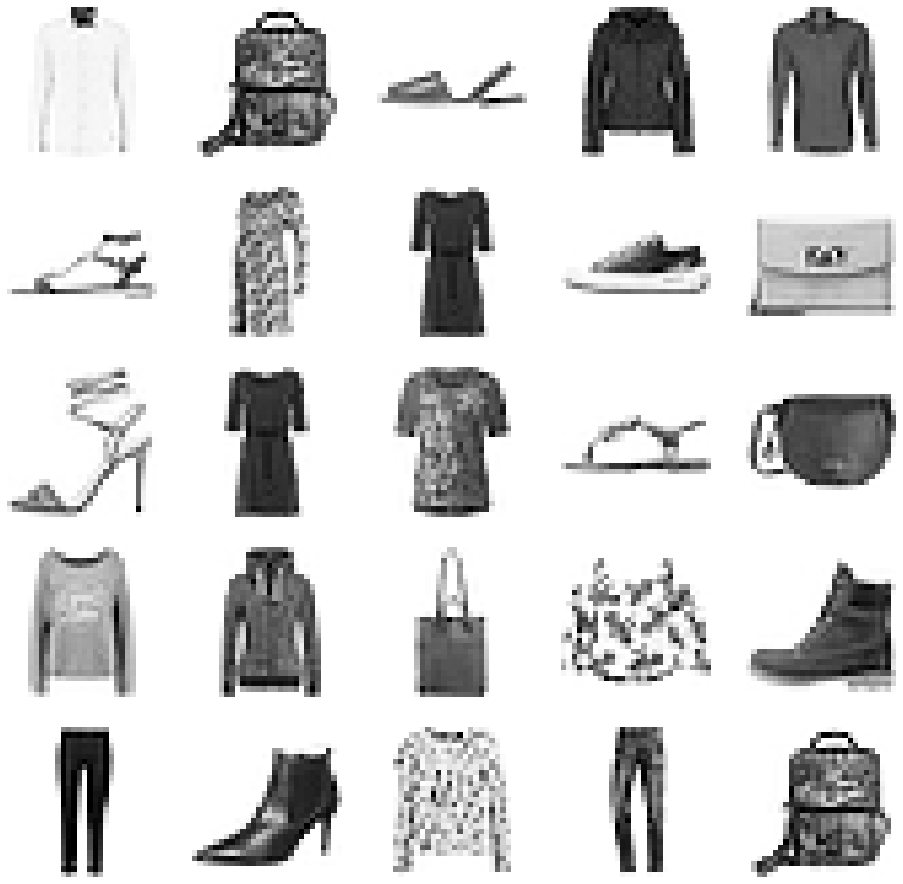

In [7]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j)
  j+=1
  plt.imshow(X_train[i],cmap="Greys")
  plt.axis('off')
plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

In [8]:
X_train.ndim

3

In [9]:
X_train = np.expand_dims(X_train, -1)
X_test =np.expand_dims(X_test, -1)

In [10]:
X_train.ndim

4

In [11]:
X_train =X_train/255
X_test = X_test/255

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train)

In [13]:
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape

((45000, 28, 28, 1), (45000,), (15000, 28, 28, 1), (15000,))

In [14]:
cnn = keras.models.Sequential([

    tf.keras.layers.Conv2D(filters=32, kernel_size=3,strides=(1,1),padding='valid', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,strides=(2,2),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])

2023-10-09 14:47:09.434455: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-10-09 14:47:09.434473: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-10-09 14:47:09.434485: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (student): /proc/driver/nvidia/version does not exist
2023-10-09 14:47:09.434692: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.fit(X_train, y_train, epochs=20 , batch_size=16 , verbose=1 , validation_data=(X_validation, y_validation))

Epoch 1/20
2813/2813 [==============================] - 9s 3ms/step - loss: 0.5856 - accuracy: 0.7811 - val_loss: 0.3995 - val_accuracy: 0.8478
Epoch 2/20
2813/2813 [==============================] - 8s 3ms/step - loss: 0.3794 - accuracy: 0.8620 - val_loss: 0.3346 - val_accuracy: 0.8739
Epoch 3/20
2813/2813 [==============================] - 8s 3ms/step - loss: 0.3329 - accuracy: 0.8803 - val_loss: 0.3072 - val_accuracy: 0.8867
Epoch 4/20
2813/2813 [==============================] - 8s 3ms/step - loss: 0.3023 - accuracy: 0.8902 - val_loss: 0.2868 - val_accuracy: 0.8927
Epoch 5/20
2813/2813 [==============================] - 8s 3ms/step - loss: 0.2808 - accuracy: 0.8978 - val_loss: 0.2816 - val_accuracy: 0.8973
Epoch 6/20
2813/2813 [==============================] - 9s 3ms/step - loss: 0.2675 - accuracy: 0.9032 - val_loss: 0.2806 - val_accuracy: 0.8962
Epoch 7/20
2813/2813 [==============================] - 10s 3ms/step - loss: 0.2518 - accuracy: 0.9080 - val_loss: 0.2905 - val_accuracy

In [17]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [18]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3230 - accuracy: 0.9016


[0.3229522109031677, 0.9016000032424927]

IndexError: list index out of range

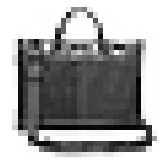

In [19]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
 plt.subplot(5,5,j)
j+=1
plt.imshow(X_train[i],cmap="Greys")
plt.axis('off')
plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))